In [1]:
import sys #Get version information
print(sys.version)

#Import necessary libraries for Data Exploration
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Setting the Aesthetics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
matplotlib.style.use("Solarize_Light2") 
%matplotlib inline 
color_pal = sns.color_palette("muted")


import warnings 
warnings.filterwarnings('ignore')

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [29]:
# Extract hour from datetime
df_telemetry['hour'] = df_telemetry['datetime'].dt.hour

# Apply logarithmic transformation
df_telemetry['log_hour'] = np.log1p(df_telemetry['hour'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_telemetry['datetime'], df_telemetry['hour'], label="Original Hour Data")
plt.plot(df_telemetry['datetime'], df_telemetry['log_hour'], label="Log-transformed Hour", linestyle="--")
plt.legend()
plt.title("Original vs. Log-transformed Hour")
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
cph.plot()

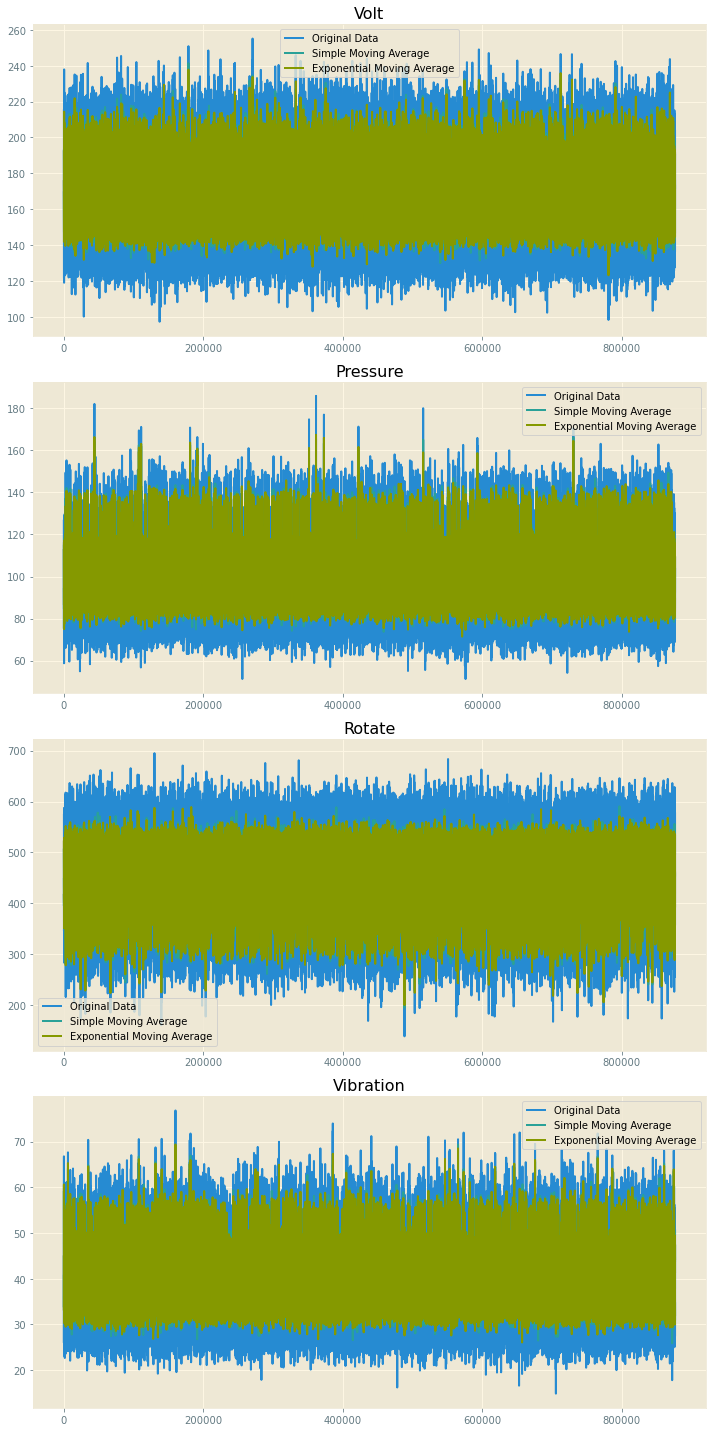

In [4]:
df_telemetry2 = pd.read_csv('PdM_telemetry.csv')
# Step 3: Calculate the SMA and EMA for each column (replace 'window_size' with the size of your moving average window)
window_size = 3 # For instance, a 3-period moving average
df_telemetry2["datetime"] = pd.to_datetime(df_telemetry["datetime"])
sma_volt = df_telemetry2['volt'].rolling(window=window_size).mean()
ema_volt = df_telemetry2['volt'].ewm(span=window_size, adjust=False).mean()

sma_pressure = df_telemetry2['pressure'].rolling(window=window_size).mean()
ema_pressure = df_telemetry2['pressure'].ewm(span=window_size, adjust=False).mean()

sma_rotate = df_telemetry2['rotate'].rolling(window=window_size).mean()
ema_rotate = df_telemetry2['rotate'].ewm(span=window_size, adjust=False).mean()

sma_vibration = df_telemetry2['vibration'].rolling(window=window_size).mean()
ema_vibration = df_telemetry2['vibration'].ewm(span=window_size, adjust=False).mean()

# Step 4: Plot the original data, SMA, and EMA for each column
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

def plot_averages(ax, title, original_data, sma_data, ema_data):
    ax.plot(original_data, label='Original Data')
    ax.plot(sma_data, label='Simple Moving Average')
    ax.plot(ema_data, label='Exponential Moving Average')
    ax.set_title(title)
    ax.legend()

plot_averages(axes[0], 'Volt', df_telemetry2['volt'], sma_volt, ema_volt)
plot_averages(axes[1], 'Pressure', df_telemetry2['pressure'], sma_pressure, ema_pressure)
plot_averages(axes[2], 'Rotate', df_telemetry2['rotate'], sma_rotate, ema_rotate)
plot_averages(axes[3], 'Vibration', df_telemetry2['vibration'], sma_vibration, ema_vibration)

plt.tight_layout()
plt.show()


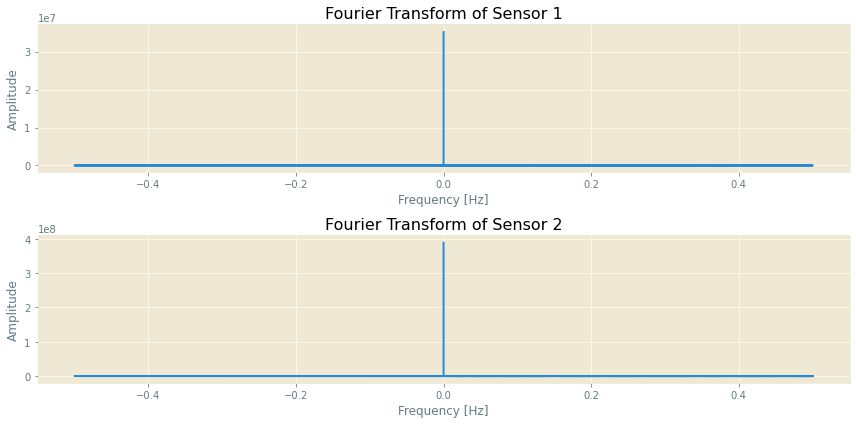

In [5]:

# Performing Fourier Transform on each sensor column
frequencies = np.fft.fftfreq(len(df_telemetry2['datetime']))
fourier_sensor1 = np.fft.fft(df_telemetry2['vibration'])
fourier_sensor2 = np.fft.fft(df_telemetry2['rotate'])

# Plotting the results
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(frequencies, np.abs(fourier_sensor1))
plt.title('Fourier Transform of Sensor 1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.subplot(2,1,2)
plt.plot(frequencies, np.abs(fourier_sensor2))
plt.title('Fourier Transform of Sensor 2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [10]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import numpy as np
import pandas as pd
from dash.dependencies import Output, Input
import random

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    dcc.Graph(id='live-graph'),
    dcc.Interval(
        id='interval-component',
        interval=1*1000,  # in milliseconds
        n_intervals=0
    )
])

# Callback to update the graph
@app.callback(
    Output('live-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_graph(df_telemetry2):
    # Simulate real-time data streaming by generating random data
    # Replace this with your real data source
    data = np.random.rand(1000)
    
    # Calculate the Fourier Transform
    frequencies = np.fft.fftfreq(len(data))
    fft_values = np.fft.fft(data)
    
    # Create a new plot with the updated data
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=frequencies, y=np.abs(fft_values),
              mode='lines',
              name='Frequency Curve'))
    fig.update_layout(title='Real-time Frequency Curve of Vibration Data',
                      xaxis_title='Frequency [Hz]',
                      yaxis_title='Amplitude')
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



ModuleNotFoundError: No module named 'dash'

In [2]:
df_failure = pd.read_csv('PdM_failures.csv')
df_errors = pd.read_csv('PdM_errors.csv')
df_machines = pd.read_csv('PdM_machines.csv')
df_maint = pd.read_csv('PdM_maint.csv')
df_telemetry = pd.read_csv('PdM_telemetry.csv')
df_collated = pd.read_csv('collated.csv')

In [19]:
def get_data_info(df):
    print("-"*50)
    print("Number of rows: ",df.shape[0])
    print("Number of Columns: ",df.shape[1])
    print("-"*50)
    print("Column-Wise missing values: ")
    print(df.isna().sum())
    print("-"*50)
    print("Count of mentioned data types")
    print(df.dtypes.value_counts())
    print("-"*50)
    print("Duplicate instances:", df.duplicated().sum())
    

def get_float_type_columns(df):
    return df.columns[df.dtypes == "float64"]

#Plot barh for a particular feature{kind : Type of the plot, color : Color of the bars, check normalize and add percentage for better info.
def plot_barh(df, feature_name, normalize=True, 
              kind='barh', figsize=(15, 5), sort_index=False, title=None, color=color_pal):
    
    counts = df[feature_name].value_counts(normalize=normalize, dropna=False)
    
    if sort_index:
        counts = counts.sort_index()
    else:
        counts = counts.sort_values()
    
    ax = counts.plot(kind=kind, figsize=figsize, grid=True, color=color_pal, title=title)
    
    # Add numbers on top of the bars as percentages
    for i, v in enumerate(counts):
        percentage_value = f"{v*100:.2f}%" if normalize else f"{v:.2f}"
        ax.text(v, i, percentage_value, color='grey', va='center')
    
    plt.xlabel('Count' if not normalize else 'Percentage')
    plt.ylabel(feature_name)
    plt.show()


# Get QQ Plot for float_type columns
def qq_plot(df, float_columns):
    num_cols = len(float_columns)
    rows = 1
    cols = num_cols
    fig = plt.figure(figsize=(5 * cols, 5))

    for i, col in enumerate(float_columns):
        data = df[col].dropna()
        stats.probplot(data, dist="norm", plot=plt.subplot(rows, cols, i+1))
        plt.title(f"Q-Q Plot for {col}")
    
    plt.tight_layout()
    plt.show()

-----------------

### ***Failures Data***

In [ ]:
get_data_info(df_failure)
print("Total number of machines that recorded failure at any point:" , len(df_failure['machineID'].value_counts()) )
print("Maximum failures recorded by any machine ID:" , df_failure['machineID'].value_counts().max())
print("Minimum frquency of failures by one of the machineID:" , df_failure['machineID'].value_counts().min())
not_found = []
for i in range(1,101):
    if i in df_failure.machineID.unique():
        pass
    else:
        not_found.append(i)
print("MachineIDs with no failures records:", not_found[0],"&", not_found[1])

--------------------------------------------------
Number of rows:  761
Number of Columns:  3
--------------------------------------------------
Column-Wise missing values: 
datetime     0
machineID    0
failure      0
dtype: int64
--------------------------------------------------
Count of mentioned data types
object    2
int64     1
dtype: int64
--------------------------------------------------
Duplicate instances: 0
Total number of machines that recorded failure at any point: 98
Maximum failures recorded by any machine ID: 19
Minimum frquency of failures by one of the machineID: 2
MachineIDs with no failures records: 6 & 77


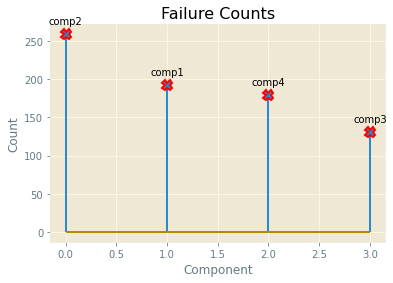

In [ ]:
# Create a DataFrame to represent the value counts
value_counts = df_failure['failure'].value_counts()

# Get the values and labels from the value counts
values = value_counts.values
labels = value_counts.index

# Create a stem plot
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(markers, marker='X', markersize=10, markeredgecolor="red", markeredgewidth=2)

# Add labels to the markers
for i, label in enumerate(labels):
    plt.annotate(label, (i, values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize the plot
plt.title('Failure Counts')
plt.xlabel('Component')
plt.ylabel('Count')

# Show the plot
plt.show()


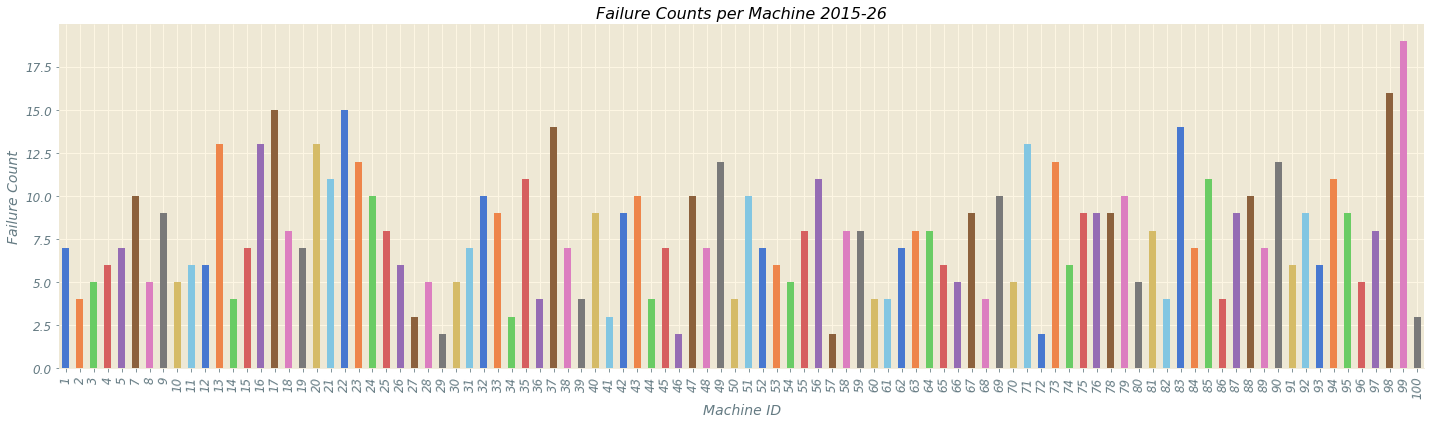

In [ ]:
from sklearn import preprocessing
df2 = df_failure.copy()
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df2['failure_encoded'] = label_encoder.fit_transform(df2['failure'])
df2['failure_encoded'] += 1
df2['failure'].unique()
avg_failure = df2.groupby('machineID')['failure_encoded'].size()


# Create the bar plot
plt.figure(figsize=(20, 6))
avg_failure.plot(kind='bar', color=color_pal)

# Customize the plot
plt.title('Failure Counts per Machine 2015-26', fontsize=16, fontstyle='italic')
plt.xlabel('Machine ID', fontsize=14, fontstyle='italic')
plt.ylabel('Failure Count', fontsize=14, fontstyle='italic')
plt.xticks(rotation=92, fontsize=12, fontstyle='italic')
plt.yticks(fontsize=12, fontstyle='italic')
sns.despine()  # Remove top and right spines

# Show the plot
plt.tight_layout()
plt.show()

Safe to say MachineID 6 and 77 did not experience failures therefore were not displayed in the bargraph above.

*Before getting into visulaizing failures, lets skip to the singals data and get a train set for machineID 99. It is a good practice to explore data on a single machine for the simplicity in drawing correlations between events.*

-----------------------------------------------------

### ***Errors***

In [ ]:
df_errors['errorID'].unique()

array(['error1', 'error3', 'error5', 'error4', 'error2'], dtype=object)

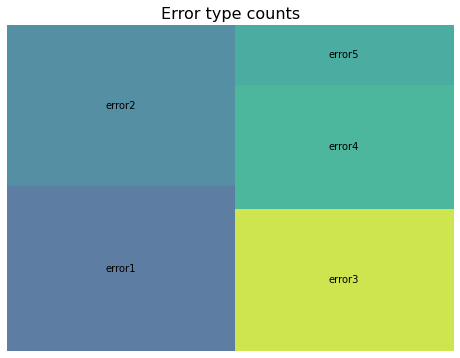

In [ ]:
import squarify #pip install squarify

# Calculate value_counts of errorID
error_counts = df_errors['errorID'].value_counts()

# Create a data frame from the value_counts
df_error_counts = pd.DataFrame({'count': error_counts.values, 'errorID': error_counts.index})

# plot it using squarify
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
squarify.plot(sizes=df_error_counts['count'], label=df_error_counts['errorID'], alpha=.8 )
plt.axis('off')
plt.title('Error type counts')
plt.show()


-------------------------------

### ***Maintenance Dataset***

In [20]:
get_data_info(df_maint)

--------------------------------------------------
Number of rows:  3286
Number of Columns:  3
--------------------------------------------------
Column-Wise missing values: 
datetime     0
machineID    0
comp         0
dtype: int64
--------------------------------------------------
Count of mentioned data types
datetime64[ns]    1
int64             1
object            1
dtype: int64
--------------------------------------------------
Duplicate instances: 0


In [ ]:
df_maint.keys()

Index(['datetime', 'machineID', 'comp'], dtype='object')

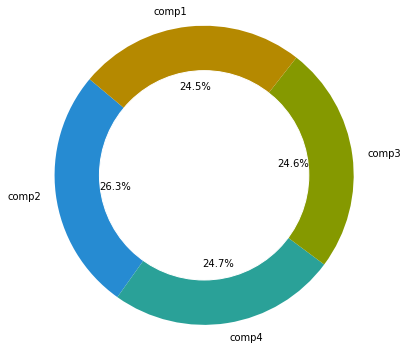

In [ ]:
# Donut Chart # Calculate value_counts of comp
comp_counts = df_maint['comp'].value_counts()

# Create a data frame from the value_counts
df_comp_counts = pd.DataFrame({'count': comp_counts.values}, index=comp_counts.index)

# Create a pie plot
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(df_comp_counts['count'], labels=df_comp_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


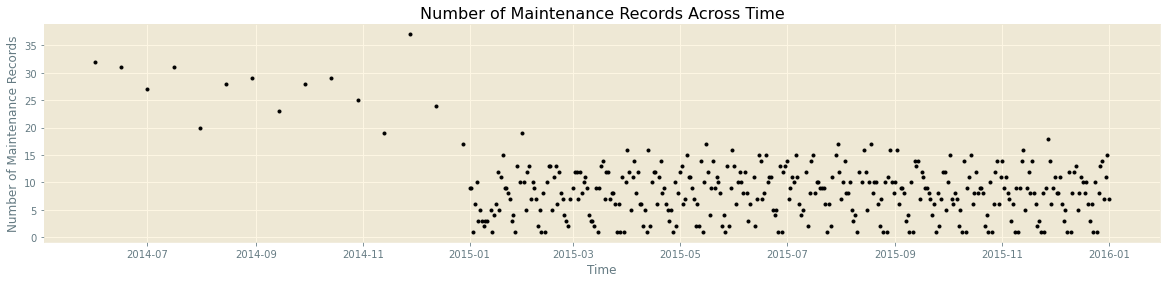

In [ ]:
df_maint['datetime'] = pd.to_datetime(df_maint['datetime'])
# Extract date from datetime
df_maint['date'] = df_maint['datetime'].dt.date

df_maint['date'].value_counts().plot(
    style="k.", 
    figsize=(20, 4), 
    title="Number of Maintenance Records Across Time"
)
plt.ylabel("Number of Maintenance Records")
plt.xlabel("Time")
plt.show()

-------------------

### ***Machines Data***

In [ ]:
print(df_machines.describe())
get_data_info(df_machines)
print('-'*50)
print('Total number of MachineIDs:', len(df_machines['machineID'].unique()))
print(df_machines['model'].value_counts())

        machineID         age
count  100.000000  100.000000
mean    50.500000   11.330000
std     29.011492    5.856974
min      1.000000    0.000000
25%     25.750000    6.750000
50%     50.500000   12.000000
75%     75.250000   16.000000
max    100.000000   20.000000
--------------------------------------------------
Number of rows:  100
Number of Columns:  3
--------------------------------------------------
Column-Wise missing values: 
machineID    0
model        0
age          0
dtype: int64
--------------------------------------------------
Count of mentioned data types
int64     2
object    1
dtype: int64
--------------------------------------------------
Duplicate instances: 0
--------------------------------------------------
Total number of MachineIDs: 100
model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64


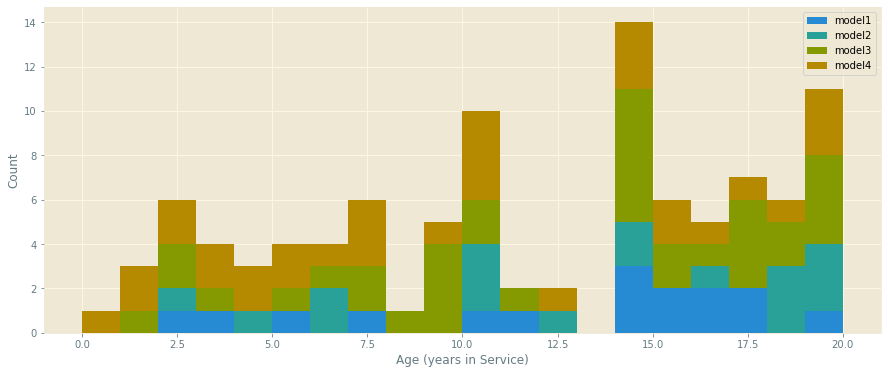

In [ ]:
plt.figure(figsize=(15, 6))

_, bins, _ = plt.hist([df_machines.loc[df_machines['model'] == 'model1', 'age'],
                    df_machines.loc[df_machines['model'] == 'model2', 'age'],
                    df_machines.loc[df_machines['model'] == 'model3', 'age'],
                    df_machines.loc[df_machines['model'] == 'model4', 'age']],
                    20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (years in Service)')
plt.ylabel('Count')
plt.legend()
plt.show()

---------------------

### ***Telemetry***

In [ ]:
display(df_telemetry.tail(1))

,datetime,machineID,volt,rotate,pressure,vibration
876099,2016-01-01 06:00:00,100,171.336037,496.09687,79.095538,37.845245


In [ ]:
get_data_info(df_telemetry)

--------------------------------------------------
Number of rows:  876100
Number of Columns:  6
--------------------------------------------------
Column-Wise missing values: 
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64
--------------------------------------------------
Count of mentioned data types
float64    4
object     1
int64      1
dtype: int64
--------------------------------------------------
Duplicate instances: 0


In [ ]:
sensors = ['volt', 'rotate', 'pressure', 'vibration']
df_pivot_telemetry = pd.pivot_table(df_telemetry, index='datetime', columns='machineID', values= sensors)
print(df_pivot_telemetry.shape)
display(df_pivot_telemetry)

(8761, 400)


pressure                                      \
machineID                   1           2           3           4     
datetime                                                              
2015-01-01 06:00:00  113.077935   76.005332   87.453199   95.929877   
2015-01-01 07:00:00   95.460525  110.907806  109.318603   92.691920   
2015-01-01 08:00:00   75.237905   97.877007  101.285580   81.506614   
2015-01-01 09:00:00  109.248561   84.440430   98.825669   96.265308   
2015-01-01 10:00:00  111.886648  110.395683  102.800017  100.885645   
...                         ...         ...         ...         ...   
2016-01-01 02:00:00   85.197443   86.021068  112.680909  118.755521   
2016-01-01 03:00:00   95.568265  101.744819   99.657113   93.214591   
2016-01-01 04:00:00   95.483913   85.709946  100.083961  108.622013   
2016-01-01 05:00:00  102.694358   93.547606   99.240117   83.377101   
2016-01-01 06:00:00  100.893691   99.946293   91.721593  112.680499   

                                                                     \
machineID                   5           6           7           8     
datetime                                                              
2015-01-01 06:00:00   84.591722  149.003582  105.878295  111.735733   
2015-01-01 07:00:00  119.082137  146.822905  106.831651  109.004027   
2015-01-01 08:00:00   90.212540  162.090315   96.961839  108.776671   
2015-01-01 09:00:00   95.072898  133.647267  102.497877   97.887247   
2015-01-01 10:00:00   76.874388  119.104654  105.237040  100.929357   
...                         ...         ...         ...         ...   
2016-01-01 02:00:00  153.187090   85.778629   95.675358  115.815266   
2016-01-01 03:00:00  152.191926   87.103379   90.748555   98.935286   
2016-01-01 04:00:00  142.451849  107.157858  101.410932  108.873397   
2016-01-01 05:00:00  156.228631   86.786087   93.777156   96.516092   
2016-01-01 06:00:00  142.414273   98.743578  107.488234   89.904141   

                                             ...        volt              \
machineID                   9           10   ...         91          92    
datetime                                     ...                           
2015-01-01 06:00:00  102.874438  119.750673  ...  177.688355  159.446409   
2015-01-01 07:00:00  102.027505   88.860999  ...  173.426162  189.422834   
2015-01-01 08:00:00   93.187589   84.382394  ...  157.582897  162.088177   
2015-01-01 09:00:00   95.469670  105.870821  ...  139.092689  174.951013   
2015-01-01 10:00:00  104.072420   98.148214  ...  156.584252  183.651525   
...                         ...         ...  ...         ...         ...   
2016-01-01 02:00:00   97.591019   92.991267  ...  170.314791  188.087304   
2016-01-01 03:00:00  103.082124   80.534193  ...  137.134341  155.680083   
2016-01-01 04:00:00   88.031814  113.411559  ...  171.885617  195.399561   
2016-01-01 05:00:00  114.479362   91.922893  ...  172.246494  175.033128   
2016-01-01 06:00:00   93.243580  111.683489  ...  165.002636  182.828969   

                                                                     \
machineID                   93          94          95          96    
datetime                                                              
2015-01-01 06:00:00  154.356894  175.639054  201.977168  155.273542   
2015-01-01 07:00:00  158.261613  166.829717  171.602257  147.249491   
2015-01-01 08:00:00  167.533443  166.130186  178.198293  176.628231   
2015-01-01 09:00:00  169.745685  169.926452  164.762482  183.274022   
2015-01-01 10:00:00  171.956004  167.610602  163.891788  180.739105   
...                         ...         ...         ...         ...   
2016-01-01 02:00:00  202.858467  191.330100  162.023059  148.087457   
2016-01-01 03:00:00  171.364527  191.313184  185.141953  161.739023   
2016-01-01 04:00:00  182.867119  187.952789  167.419408  129.156343   
2016-01-01 05:00:00  166.943545  180.425830  181.805247  185.392000   
2016-01-01 06:00:00  186.324464  171.397961  

In [ ]:
get_data_info(df_pivot_telemetry)

--------------------------------------------------
Number of rows:  8761
Number of Columns:  400
--------------------------------------------------
Column-Wise missing values: 
          machineID
pressure  1            0
          2            0
          3            0
          4            0
          5            0
                      ..
volt      96           0
          97           0
          98           0
          99           0
          100          0
Length: 400, dtype: int64
--------------------------------------------------
Count of mentioned data types
float64    400
dtype: int64
--------------------------------------------------
Duplicate instances: 0


Since the shape is big, lets make a train set for data exploration.

In [ ]:
# telemetry records of Machine ID: 99 
mach_99 = df_telemetry.loc[df_telemetry['machineID'] == 99].reset_index(drop=True)

# Change datatype of the timestamp column from object to datetime
mach_99['datetime'] = pd.to_datetime(mach_99['datetime'])

now we can check these dates for machine 99 to check each failure component and sensors behaviour.

In [ ]:
# Select the dates to check from failure records 
# checking long term patterns by manually selecting the time period. 14 day interval in this case.  
dates_to_check = ["2015-01-02", "2015-01-18", "2015-02-02", "2015-02-17"] 

def plot_sensor_data(df, date, days_before=30, days_after=30, figsize=(10, 10), hspace=0.025):
    # Change datatype of the timestamp column from object to datetime
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Find the index of the specified date
    st = df.loc[df['datetime'] == date].index.values[0]

    # Filter the telemetry data by the date and specified number of days before and after
    select = df.loc[st - days_before*24: st + days_after*24, :]

    # Create subplots
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
    plt.subplots_adjust(hspace=hspace)
    # Plot sensor data
    ax[0].plot(select['datetime'], select['volt'])
    ax[0].set_ylabel("Volt")

    ax[1].plot(select['datetime'], select['rotate'])
    ax[1].set_ylabel("Rotation")

    ax[2].plot(select['datetime'], select['pressure'])
    ax[2].set_ylabel("Pressure")

    ax[3].plot(select['datetime'], select['vibration'])
    ax[3].set_ylabel("Vibration")

    ax[3].set_xlabel("Timestamp")
    ax[3].tick_params(axis='x', rotation=45)

    # Adjust space between subplots
    plt.tight_layout()
    plt.show()


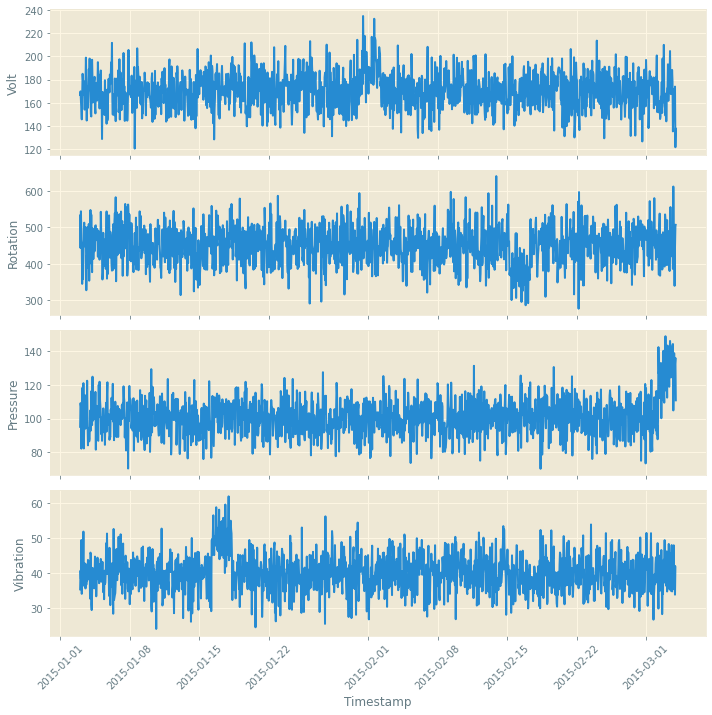

In [ ]:
plot_sensor_data(df = mach_99, date = "2015-02-02") 

In [ ]:
#Manually checking the fequency changes and comparing them with the failure records 
print(df_failure[df_failure['machineID']== 99]['failure'][0:4])
print(df_failure[df_failure['machineID']== 99]['datetime'][0:4]) 

739    comp3
740    comp4
741    comp1
742    comp2
Name: failure, dtype: object
739    2015-01-02 03:00:00
740    2015-01-18 06:00:00
741    2015-02-02 06:00:00
742    2015-02-17 06:00:00
Name: datetime, dtype: object


1. failure in comp4 on 2015-01-18 show anomalous pattern in vibration.
2. failure in comp2 on 2015-02-17 show drastic decline in rotations per minute on that date. 
3. failure in comp1 on 2015-02-02 was an effect of high voltage input recorded. 
4. failure in comp3 can also be identified as must majorly relate to pressure. 

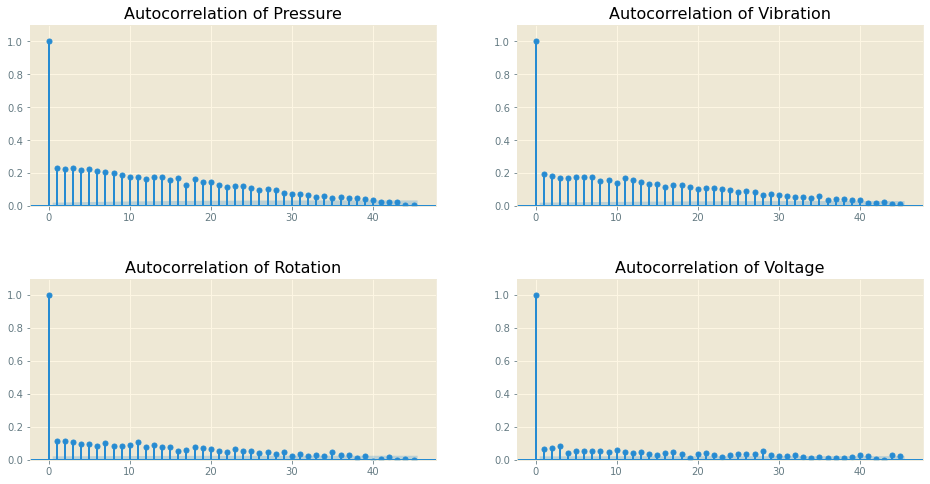

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf 
#  Similary, import "plot_pacf" from .tsaplots to get partial autocorrelation 

# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)  # Adjust vertical gap between plots

# Plot autocorrelation of pressure
plot_acf(mach_99['pressure'], lags=45, ax=axes[0, 0])
axes[0, 0].set_ylim(0, 1.1)
axes[0, 0].set_title("Autocorrelation of Pressure")

# Plot autocorrelation of vibration
plot_acf(mach_99['vibration'], lags=45, ax=axes[0, 1])
axes[0, 1].set_ylim(0, 1.1)
axes[0, 1].set_title("Autocorrelation of Vibration")

# Plot autocorrelation of rotation
plot_acf(mach_99['rotate'], lags=45, ax=axes[1, 0])
axes[1, 0].set_ylim(0, 1.1)
axes[1, 0].set_title("Autocorrelation of Rotation")

# Plot autocorrelation of voltage
plot_acf(mach_99['volt'], lags=45, ax=axes[1, 1])
axes[1, 1].set_ylim(0, 1.1)
axes[1, 1].set_title("Autocorrelation of Voltage")

# Display the plots
plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'resample'

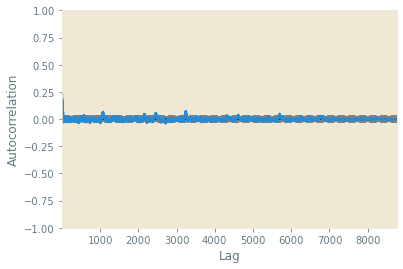

In [ ]:
pd.plotting.autocorrelation_plot(mach_99['pressure']).resample('1H').mean()

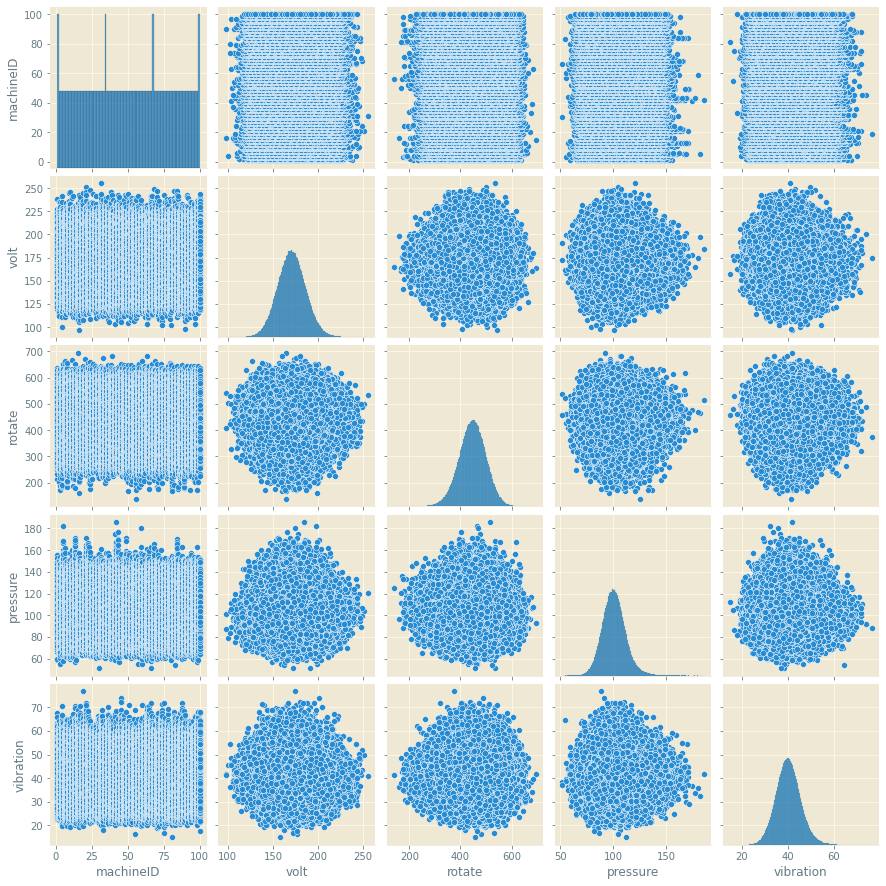

In [ ]:
sns.pairplot(df_telemetry)

-----------------
*Survival Analysis* 

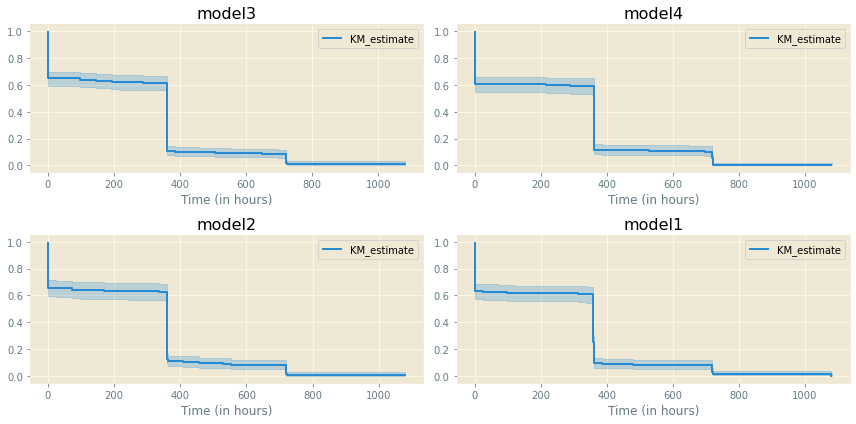

In [ ]:
from lifelines import KaplanMeierFitter

# Function to calculate time since last maintenance
def timeslm(k):
    output = [0]*len(k)
    output[1] = 1
    for i in range(2, len(k)):
        if (k.iloc[i-1] == 1):
            output[i] = 1
        else:
            output[i] = output[i-1] + 1
    return output


# Load data
df_tele = pd.read_csv('PdM_telemetry.csv')
df_fail = pd.read_csv('PdM_failures.csv')
df_err = pd.read_csv('PdM_errors.csv')
machines_df = pd.read_csv('PdM_machines.csv')
df_maint = pd.read_csv('PdM_maint.csv')

# Convert datetime columns to datetime objects
df_tele['datetime'] = pd.to_datetime(df_tele['datetime'], dayfirst = True)
df_fail['datetime'] = pd.to_datetime(df_fail['datetime'], dayfirst = True)
df_err['datetime'] = pd.to_datetime(df_err['datetime'], dayfirst = True)
df_maint['datetime'] = pd.to_datetime(df_maint['datetime'], dayfirst = True)

# Merge dataframes
df = pd.merge(df_tele, df_fail, how = 'left', on = ['datetime', 'machineID'])
df['failure'] = df['failure'].notna().astype(int)
err_fail = pd.merge(df, df_err, how = 'left', on = ['datetime','machineID'])
err_fail_maint = pd.merge(err_fail, df_maint, how = 'left', on = ['datetime', 'machineID'])
err_fail_maint['comp'] = err_fail_maint['comp'].notna().astype(int)
df_new = pd.merge(err_fail_maint, machines_df, how = 'left', on = ['machineID'])

# Calculate time since last maintenance
df_new['time_since_last_maintenance'] = df_new.groupby('machineID')['comp'].transform(timeslm)

# Create binary failure columns for each component
for i in range(1, 5):
    df_new['failure_comp' + str(i)] = (df_new['failure'] == 1) & (df_new['comp'] == i)


def plot_comp(data, time_comp, fail_comp, component, model, ax):
    comp = data[(data[fail_comp] == 1) & (data['model'] == model)]
    time = comp[time_comp]
    status = comp[fail_comp]
    kmf = KaplanMeierFitter()
    kmf.fit(durations=time, event_observed=status)
    kmf.plot_survival_function(ax=ax)
    ax.set_title( model)
    ax.set_xlabel('Time (in hours)')

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# List of unique models
unique_models = df_new['model'].unique()

# Loop over models and plot survival function for comp1 in each subplot
for i, model in enumerate(unique_models):
    ax = axes[i // 2, i % 2]
    plot_comp(df_new, 'time_since_last_maintenance', 'failure_comp1', 'comp1', model, ax)

plt.tight_layout()
plt.show()

In [ ]:
from lifelines import KaplanMeierFitter

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

def median_survival_time(data, time_col, event_col):
    """Fit Kaplan-Meier and return median survival time."""
    kmf.fit(data[time_col], data[event_col])
    return kmf.median_survival_time_

# Calculate median survival times for each component and machineID
median_lifetimes = []

for machine in df_new['machineID'].unique():
    for component_num in range(1, 5):
        subset = df_new[(df_new['machineID'] == machine) & 
                        (df_new[f'failure_comp{component_num}'] == 1)]
        
        if not subset.empty:
            median_life = median_survival_time(subset, 'time_since_last_maintenance', f'failure_comp{component_num}')
            median_lifetimes.append({'machineID': machine, 
                                     'component': f'comp{component_num}', 
                                     'median_lifetime': median_life})

# Convert to dataframe
median_df = pd.DataFrame(median_lifetimes)

print(median_df)


median_df['median_lifetime'].value_counts()